<a href="https://colab.research.google.com/github/Waris24/Movie_Recommendation_Systerm/blob/main/YBI_Final_project(Movie_recomand).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movie Recommendation System


# Objective
To create a movie recommendation system based on text similarity using the Cosine Similarity technique. The primary goal is to help users discover movies similar to their favorite choices from a dataset. The code employs natural language processing (NLP) techniques to extract and combine various movie features, such as genre, keywords, taglines, cast, and director. After processing the data, the code prompts users to input their favorite movie. It then identifies similar movies using Cosine Similarity and presents a list of the top 30 recommended movies based on similarity scores. Additionally, the code allows users to input another favorite movie and provides a refined list of the top 10 movies that closely match their preferences. The recommendation process assists users in discovering movies with thematic and contextual similarities to their selected favorites.

### Step 1 Import Library




In [50]:
import pandas as pd

In [2]:
import numpy as np

### Import Data

In [38]:
df = pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/Movies%20Recommendation.csv")

### Step 3 Describe Data

In [ ]:
df.head()

In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
df.shape

In [ ]:
df.columns

## Step 4 Define Target Variable (y) and Feature Variables (X)

In [5]:
#Step 3: Define target (y) and fecture (x)
df_feature = df[['Movie_Genre', 'Movie_Keywords', 'Movie_Tagline', 'Movie_Cast', 'Movie_Director']].fillna('')

Selected five existing features to recommand movies.

In [ ]:
df_feature.shape

In [ ]:
df_feature

###Step 5 Train Test Split

In [7]:
X = df_feature['Movie_Genre'] + ' ' + df_feature['Movie_Keywords'] + ' ' + df_feature['Movie_Tagline']+ ' ' + df_feature['Movie_Cast'] + ' ' + df_feature['Movie_Director']

In [ ]:
X

In [ ]:
X.shape

### Step 6: Modeling

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
tfid = TfidfVectorizer()

In [10]:
X = tfid.fit_transform(X)

In [ ]:
X.shape

In [11]:
from sklearn.metrics.pairwise import cosine_similarity

In [12]:
Similarity_Score = cosine_similarity(X)

In [ ]:
Similarity_Score

In [51]:
Similarity_Score.shape

(4760, 4760)

### Step 7: Model Evaluation

In [14]:
fv_movie = input('Enter your favourite movie name: ')

Enter your favourite movie name: avtaar


In [15]:
All_Movietitle_list = df['Movie_Title'].tolist()

In [49]:
import difflib

In [44]:
movie_recomand = difflib.get_close_matches(fv_movie, All_Movietitle_list)


In [45]:
close_match = movie_recomand[0]


In [46]:
Index_of_close_match_movie = df[df.Movie_Title == close_match]['Movie_ID'].values[0]


In [48]:
#Getting a list of similar movies

Recommand_score = list(enumerate(Similarity_Score[Index_of_close_match_movie]))


In [21]:
len(Recommand_score)

4760

#### Get all movies sorted based on recommadation score wrt favorite movie




In [52]:
#sort all movies based on their similar score
Sorted_Similar_Movie = sorted(Recommand_score, key = lambda x:x[1], reverse = True)

### Step 8 Prediction

In [23]:
#print the number of movies based on index

print("Top 30 movies suggested for you: \n")

i = 1
for movie in Sorted_Similar_Movie:
  index = movie[0]
  title_from_index = df[df.index==index]['Movie_Title'].values[0]
  if(i<31):
    print(i, '.', title_from_index)
    i+=1

Top 30 movies suggested for you: 

1 . Niagara
2 . Caravans
3 . My Week with Marilyn
4 . Brokeback Mountain
5 . Harry Brown
6 . Night of the Living Dead
7 . The Curse of Downers Grove
8 . The Boy Next Door
9 . Back to the Future
10 . The Juror
11 . Some Like It Hot
12 . Enough
13 . The Kentucky Fried Movie
14 . Eye for an Eye
15 . Welcome to the Sticks
16 . Alice Through the Looking Glass
17 . Superman III
18 . The Misfits
19 . Premium Rush
20 . Duel in the Sun
21 . Sabotage
22 . Small Soldiers
23 . All That Jazz
24 . Camping Sauvage
25 . The Raid
26 . Beyond the Black Rainbow
27 . To Kill a Mockingbird
28 . World Trade Center
29 . The Dark Knight Rises
30 . Tora! Tora! Tora!


## Top 10 recommendation system



In [31]:
Movie_Name = input('Enter your favorite movie name: ')

list_of_all_titles = df['Movie_Title'].tolist()
Close_Match = difflib.get_close_matches(Movie_Name, list_of_all_titles)
Close_Hatch_Find = Close_Match[0]
Index_of_Movie = df[df.Movie_Title == Close_Hatch_Find]['Movie_ID'].values[0]
Recommendation_Score = list(enumerate(Similarity_Score[Index_of_Movie]))
sorted_similar_movies = sorted(Recommendation_Score, key=lambda x: x[1], reverse=True)

print("Top 10 Movies suggested for you:\n")

top_10_movies = []  # Initialize an empty list to store top 10 movie titles
i = 1
for movie in sorted_similar_movies:
    index = movie[0]
    title_from_index = df[df.index == index]['Movie_Title'].values[0]
    if i < 11:
        top_10_movies.append(title_from_index)  # Add movie title to the list
        print(i, '.', title_from_index)
        i += 1


Enter your favorite movie name: avtaar
Top 10 Movies suggested for you:

1 . Niagara
2 . Caravans
3 . My Week with Marilyn
4 . Brokeback Mountain
5 . Harry Brown
6 . Night of the Living Dead
7 . The Curse of Downers Grove
8 . The Boy Next Door
9 . Back to the Future
10 . The Juror


## Data Visualization

In [41]:
import matplotlib.pyplot as plt


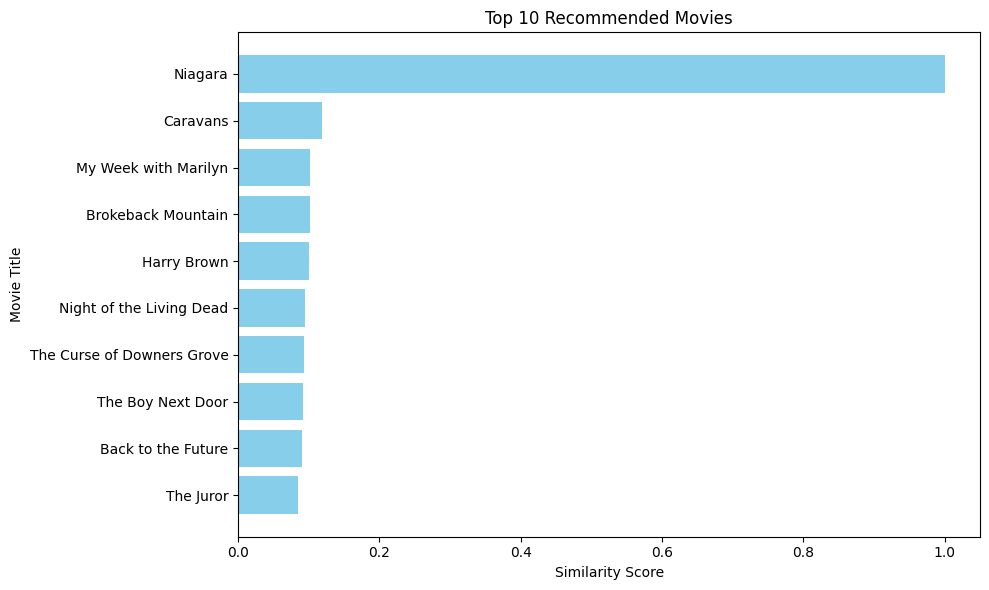

In [43]:
# Visualization for top 10 movies
plt.figure(figsize=(10, 6))
plt.barh(top_10_movies, [movie[1] for movie in sorted_similar_movies[:10]], color='skyblue')
plt.xlabel('Similarity Score')
plt.ylabel('Movie Title')
plt.title('Top 10 Recommended Movies')
plt.gca().invert_yaxis()  # Invert y-axis to have highest similarity at the top
plt.tight_layout()
plt.show()

## Explaination
This project employs Cosine Similarity and natural language processing to build a movie recommendation system. Users input their favorite movie, and the code suggests similar movies from a dataset based on genre, keywords, taglines, cast, and director. It calculates similarity scores, presents top 30 recommendations, and offers a refined list of top 10 choices for user input. A simple yet effective tool for discovering movies with thematic likeness, enhancing movie exploration.
